In [1]:
import pandas as pd
import pickle

import os

from torchmetrics.regression import SymmetricMeanAbsolutePercentageError
import torch

In [2]:
def metric(y_pred, y_test):
    ad_smape = SymmetricMeanAbsolutePercentageError()
    smape_adjust = torch.mean(torch.stack([ad_smape(y_pred.detach().cpu()[i], y_test.detach().cpu()[i]) * 0.5 for i in range(len(y_test))]))
    return smape_adjust

In [4]:
data_path = '/home/smart01/SFLAB/su_GTM_t/GTM_T_sanguk/'
meta_df = pd.read_csv(os.path.join(data_path,'meta_data_image_text_nofilter.csv'), index_col='item_number')
meta_df = meta_df.drop(['sales_std'], axis=1)

df = pd.DataFrame()

df['fabric'] = meta_df.iloc[:,1:6].idxmax(axis=1).apply(lambda x:x.split('_')[-1])
df['color'] = meta_df.iloc[:,6:19].idxmax(axis=1).apply(lambda x:x.split('_')[-1])
df['category'] = meta_df.iloc[:,19:].idxmax(axis=1).apply(lambda x:x.split('_')[-1])
df['sales_mean'] = meta_df.iloc[:,0]

test_list = pickle.load(open("/home/smart01/SFLAB/su_GTM_t/GTM_T_sanguk/12salesweek_test_item_number296.pkl", 'rb')).drop("MTPT6102")[:]
train_list = df.index[~df.index.isin(test_list)].drop('JROP328D').drop('JROP328E').drop('MQPT3129')[:]

train_df = df.loc[train_list]
test_df = df.loc[test_list]

In [5]:
group_df = df.round().groupby(['color', 'category'], as_index=False)['sales_mean'].apply(list)

group_df['mean'] = df.groupby(['color', 'category'], as_index=False)['sales_mean'].mean()['sales_mean']
group_df.to_csv('./color_category_group.csv')
for idx, (color, cat, sales_list, mean) in group_df.iterrows():
    print(f'{color}\t{cat}\t{round(mean,2)}\t{list(map(lambda x:round(x,2), sales_list))}')

BEIGE	DP	16.33	[16.0]
BEIGE	HP	22.83	[23.0]
BEIGE	OP	13.37	[4.0, 6.0, 12.0, 6.0, 24.0, 6.0, 23.0, 11.0, 34.0, 10.0, 10.0, 8.0, 3.0, 44.0, 17.0, 30.0, 12.0, 10.0, 11.0, 24.0, 12.0, 11.0, 22.0, 8.0, 33.0, 2.0, 40.0, 12.0, 24.0, 16.0, 6.0, 20.0, 6.0, 6.0, 14.0, 3.0, 3.0, 6.0, 7.0, 12.0, 1.0, 18.0, 20.0, 3.0, 4.0, 6.0, 7.0]
BEIGE	PT	107.89	[68.0, 24.0, 13.0, 99.0, 112.0, 97.0, 111.0, 59.0, 160.0, 32.0, 114.0, 33.0, 78.0, 264.0, 20.0, 7.0, 243.0, 155.0, 264.0, 9.0, 165.0, 278.0, 75.0]
BEIGE	WP	16.08	[16.0]
BLACK	DP	26.31	[41.0, 43.0, 16.0, 17.0, 10.0, 19.0, 17.0, 46.0, 20.0, 17.0, 6.0, 39.0, 8.0, 26.0, 72.0]
BLACK	HP	29.03	[20.0, 15.0, 52.0]
BLACK	OP	13.97	[1.0, 7.0, 8.0, 27.0, 2.0, 4.0, 8.0, 29.0, 16.0, 15.0, 5.0, 28.0, 5.0, 1.0, 8.0, 12.0, 6.0, 9.0, 4.0, 2.0, 8.0, 6.0, 6.0, 6.0, 3.0, 17.0, 19.0, 11.0, 31.0, 24.0, 3.0, 19.0, 27.0, 9.0, 5.0, 6.0, 10.0, 12.0, 48.0, 15.0, 10.0, 3.0, 40.0, 43.0, 10.0, 20.0, 32.0, 5.0, 10.0, 6.0, 34.0, 22.0, 7.0, 8.0, 10.0, 28.0, 5.0, 12.0, 8.0, 6.0, 2.0, 10.0,

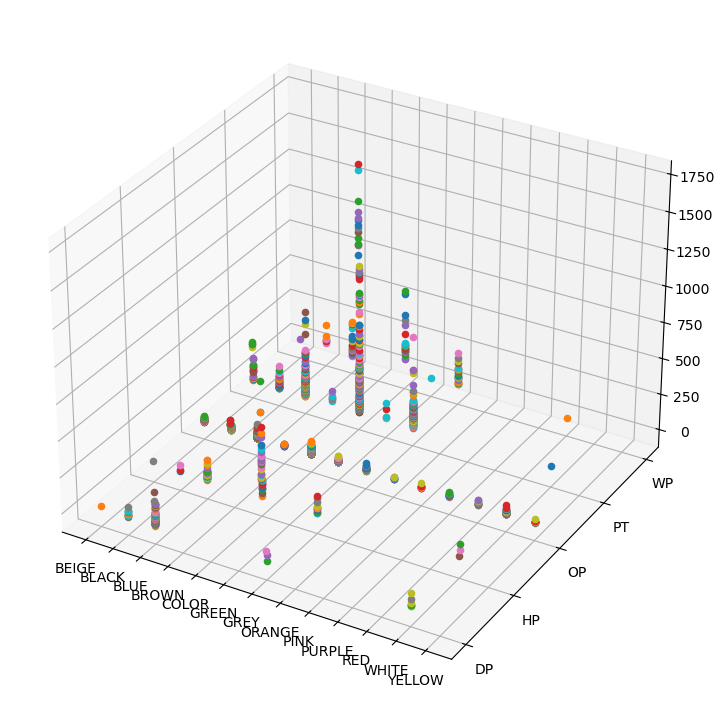

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(projection='3d')

temp_df = df.copy()
temp_df['fabric'] = df['fabric'].astype('category').cat.codes
temp_df['color'] = df['color'].astype('category').cat.codes
temp_df['category'] = df['category'].astype('category').cat.codes

for idx, (fabric, color, cat, sales_mean) in temp_df.iterrows():
    x = color
    y = cat
    z = sales_mean
    ax.scatter(x, y, z)  # this way you can control color/marker/size of each group freely
    
x_list = sorted(df['color'].astype('category').unique().tolist())
y_list = sorted(df['category'].astype('category').unique().tolist())

ax.set_xticks(range(0,len(x_list)))
ax.set_yticks(range(0,len(y_list)))
ax.set_xticklabels(x_list)
ax.set_yticklabels(y_list)

# ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()